<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/RFM_SuperStore_Analisis_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFM (Recency, Frequency, Monetary, Profit*)

El modelo RFM (Recency, Frequency, Monetary) es una técnica de análisis de comportamiento del cliente que se utiliza para segmentar una base de clientes en grupos específicos. El objetivo es identificar a los clientes más valiosos y entender cómo interactúan con un negocio. El modelo se basa en tres métricas principales:

1. **Recency (R) - Reciente**: Mide el tiempo transcurrido desde la última transacción o interacción que un cliente ha tenido con la marca. En general, a menor tiempo desde la última compra, más "reciente" es el cliente. Esta métrica se basa en la idea de que los clientes que han comprado recientemente son más propensos a hacerlo de nuevo en comparación con los que no lo han hecho durante mucho tiempo.
2. **Frequency (F) - Frecuencia**: Mide la cantidad de veces que un cliente ha realizado una transacción o interactuado con la marca en un período de tiempo específico. Los clientes que interactúan con más frecuencia suelen ser más leales a la marca.
3. **Monetary (M) - Monetario**: Representa el valor total de las transacciones que un cliente ha realizado en un período de tiempo determinado. En otras palabras, es una medida del valor total que un cliente ha aportado a la empresa. Cuanto más alto sea este valor, más valioso es el cliente.
4. **Profit (P) - Utilidad**:

**Instrucciones**

1. **Descargar el Dataset**: Descargar el archivo **`SUPERSTORE`**
2. **Importar el Dataset**: Utilizar Python y Pandas para importar el dataset.
3. **Análisis Exploratorio**: Revisar las distribuciones de los datos. ¿Tenemos outliers?
4. ****Cálculo de Métricas RFM****
    1. **Recency (R)**: Calcula cuánto tiempo ha pasado desde la última compra de cada cliente.
    2. **Frequency (F)**: Cuenta cuántas veces cada cliente ha hecho una compra.
    3. **Monetary (M)**: Suma cuánto ha gastado cada cliente en total.
5. **Recomendaciones para cada segmento**: Basándote en las características de cada segmento, formula recomendaciones específicas. Analiza cada segmento.


In [69]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
from pandas.io.excel import read_excel
df = read_excel('https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/machine_learning/datasets/superstore.xlsx')

# 4 Cálculo de Métricas RFM

## **Recency (R): Calcula cuánto tiempo ha pasado desde la última compra de cada cliente.**

*  Utiliza la fecha mayor para calcular el tiempo que ha pasado en días
*  Calcular los días desde la última compra `['Order Date'].max()` para cada cliente `'Customer ID'`, `groupby` es una alternativa
*  Recency es la diferencia en días entre la `ultima compra` y la `fecha mayor`




In [12]:
# Convertir la columna "Order Date" a tipo de dato fecha
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [40]:
fecha_mayor = df['Order Date'].max()
fecha_mayor

Timestamp('2017-12-30 00:00:00')

**Calcula la recencia: Resta 'Order Date' de cada fila por 'fecha_mayor'**




In [87]:
# Calcula la recencia: Resta 'Order Date' de cada fila por 'fecha_mayor' para obtener la antigüedad de cada pedido.
df['Recency'] = fecha_mayor - df['Order Date']

# Convierte el resultado de la resta, que es un Timedelta, a un número entero representando la cantidad de días.
df['Recency'] = df['Recency'].dt.days

# Ahora, 'df['Recency']' contiene los días transcurridos desde cada 'Order Date' hasta 'fecha_mayor'.
df['Recency'].head()

0    417
1    417
2    566
3    811
4    811
Name: Recency, dtype: int64

**Genera una tabla llamada df_recency que tenga la recencia de cada cliente**

Puedes utilizar group_by, aquí te dejo la muestra de como se hace un buen prompt a la IA

**Prompt:**
```
Tengo un DataFrame de pandas llamado df que incluye, las columnas "Customer ID" y "Recency".

La columna "Recency" indica el número de días desde la última transacción para cada pedido.

Me gustaría agrupar los datos por "Customer ID", encontrar el valor mínimo de "Recency" para cada cliente, y luego crear un nuevo DataFrame con estos valores mínimos.

Este nuevo DataFrame deberá llamarse "df_recency" e incluir dos columnas: "Customer ID" y una columna "recency" que contiene el valor mínimo de recencia para cada cliente.

Además, quiero que "Customer ID" sea una columna regular en el nuevo DataFrame, no el índice.

Por favor, proporciona el código de pandas necesario para realizar estas operaciones. Escribe solo el código.

```

In [64]:
# Agrupar por "Costumer ID" y calcular el mínimo de "Recency"
df_recency = df.groupby ________________

df_recency

,Customer ID,recency
0,AA-10315,184
1,AA-10375,19
2,AA-10480,259
3,AA-10645,55
4,AB-10015,415
...,...,...
788,XP-21865,43
789,YC-21895,4
790,YS-21880,9
791,ZC-21910,54


In [88]:
df_recency['recency'].describe()

count     793.000000
mean      146.802018
std       186.211051
min         0.000000
25%        30.000000
50%        75.000000
75%       183.000000
max      1165.000000
Name: recency, dtype: float64

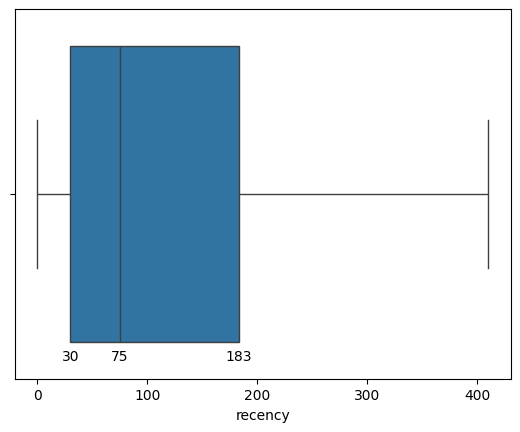

In [103]:
# Crear el boxplot corrigiendo la sintaxis
sns.boxplot(data=df_recency, x='recency', showfliers=False)

# Obtener los valores de los percentiles
q25 = df_recency['recency'].quantile(0.25)
q50 = df_recency['recency'].quantile(0.5)
q75 = df_recency['recency'].quantile(0.75)

# Ajustar las coordenadas 'y' para las etiquetas para que aparezcan en el lugar correcto
# y no se superpongan con el boxplot. Las coordenadas 'y' se han ajustado para mejor visualización.
plt.text(q25, 0.45, '{:.0f}'.format(q25), ha='center')  # ha='center' alinea horizontalmente el texto al centro
plt.text(q50, 0.45, '{:.0f}'.format(q50), ha='center')
plt.text(q75, 0.45, '{:.0f}'.format(q75), ha='center')

# Mostrar el gráfico
plt.show()

## **Frequency (F): Cuenta cuántas veces cada cliente ha hecho una compra.**



*   Crea un dataframe df_frequency que tenga el Customer_ID y el Count
*   Cuidado, toma en cuenta que cada linea representa una linea de la factura, no una compra, puedes tener varias lineas por compra.



In [ ]:
# Paso 2: Calcular Frequency
df_frequency = df.groupby_______________________
df_frequency.columns = ['customer_ID', 'frecuency']
df_frequency

**Monetary (M): Suma cuánto ha gastado cada cliente en total.**



In [ ]:

# Paso 3: Calcular Monetary
df_monetary =
df_monetary.columns = ['customer_ID', 'monetary']

**Profit (P): Como el monetary pero para el profit por cliente**

**Combina los 3 dataframes en uno**


*   El dataframe deberia tener la estructura `customer_ID, recency, frecuency, monetary, profit`

**Prompt**



> `En pandas, tengo 4 dataframes llamadas (df_recency, df_frequency, df_monetary, y df_profit).
Ayudame a unir los 4 dataframes en uno solo llamado 'df_rfmp' usando 'customer_ID' como clave común, que es comun en todos los dataframes.`




In [ ]:
df_rfmp = pd.merge__________________
df_rfmp = pd.merge__________________
df_rfmp = pd.merge__________________


df_rfmp

Calcula los Cuartiles para cada una de las medidas R, F, M, P

In [ ]:
# Para 'recency', donde un número más bajo es mejor, invertimos las etiquetas
df_rfmp['recency_score'] = pd.qcut(df['recency'], 4, labels=[4, 3, 2, 1])

# Para 'frequency', 'monetary', 'profit', donde números más altos son mejores
df_rfmp['frequency_score'] = pd.qcut(df['frequency'], 4, labels=[1, 2, 3, 4])
df_rfmp['monetary_score'] = pd.qcut(df['monetary'], 4, labels=[1, 2, 3, 4])
df_rfmp['profit_score'] = pd.qcut(df['profit'], 4, labels=[1, 2, 3, 4])


# Analiza cada uno de los grupos, investiga sobre RFM y prepara una presentación con recomendaciones para SuperStore.